# APSC-5984 Week 11: Computer Vision

Computer vision (CV) is a field of study that deals with how computers can be made to gain understaning from digital images or videos. In this note, we will introduce basic ideas of image processing and convolutional operations in Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL

## Basic Image Processing

### File loading

We can use the knowledge of matrix operations we learned earlier to conduct basic image processing. Let's load an image and convert it to a matrix using the library `PIL` (Python Imaging Library).

In [9]:
# Option 1: Load the data (with statement)
with PIL.Image.open('cow.jpg') as image_file:
    image = np.array(image_file)

# Option 2: Equivalent to the above
image_file = PIL.Image.open('cow.jpg')
image = np.array(image_file)
image_file.close()

### Inspect the image

Since the image has been converted to a numpy array, we can use `numpy` functions to inspect and manipulate the image. We can use `shape` to see the size of the image.

<center><img src="figures/img_rgb.png" width="800"/></center>


In [8]:
# check the dimensions of the image
print("Shape of the image: ", image.shape)

# check the data type of the image
print("Data type of the image: ", image.dtype)

# check the minimum and maximum values of the image
print("Minimum value of the image: ", image.min())
print("Maximum value of the image: ", image.max())


Shape of the image:  (1333, 2000, 3)
Data type of the image:  uint8
Minimum value of the image:  0
Maximum value of the image:  255


The printed information tells us that the image is a 3D array with 1333 rows (height), 2000 columns (width), and 3 channels (RGB). We can use `imshow` to display the image. It is noted that to display the image correctly, numbers in the array must either be between 0 and 1 or between 0 and 255.

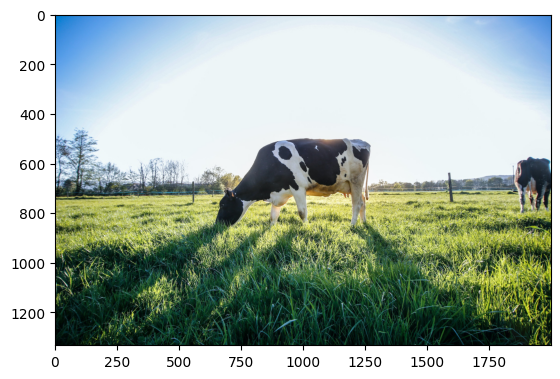

In [10]:
plt.imshow(image)

We display the same image by different color channels (the brighter the color, the higher the value of the corresponding channel).

Text(0.5, 1.0, 'Blue channel')

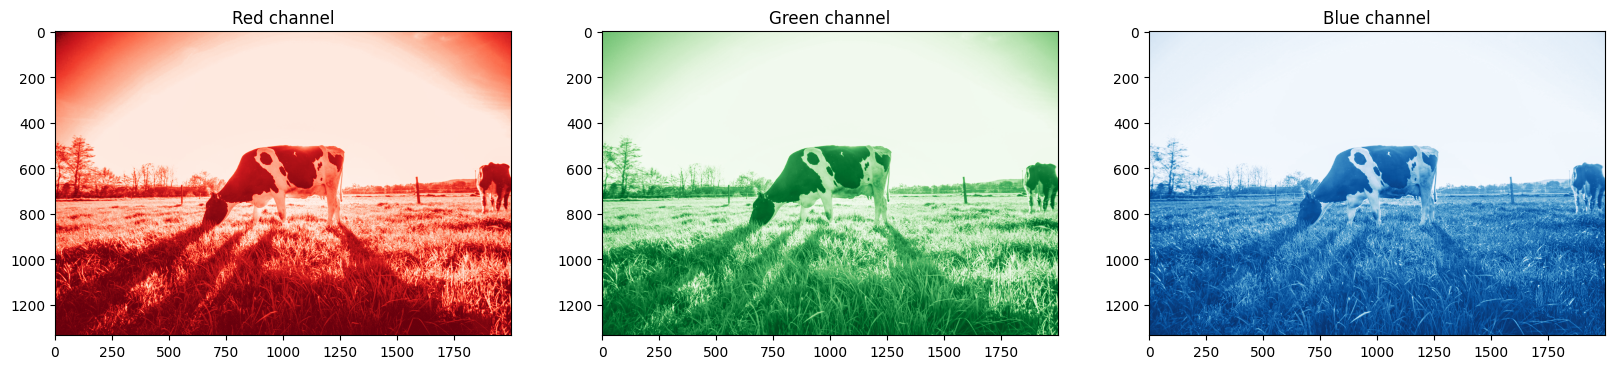

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(20, 15))
ax[0].imshow(image[:, :, 0], cmap='Reds_r')
ax[0].set_title('Red channel')
ax[1].imshow(image[:, :, 1], cmap='Greens_r')
ax[1].set_title('Green channel')
ax[2].imshow(image[:, :, 2], cmap='Blues_r')
ax[2].set_title('Blue channel')

We know that color black is represented by (0, 0, 0) and color white is represented by (255, 255, 255). Both of them have 0 variance across all channels. We can verify this idea by calculating the variance over the axis of channels (axis=2).

Text(0.5, 1.0, 'Standard deviation of each pixel')

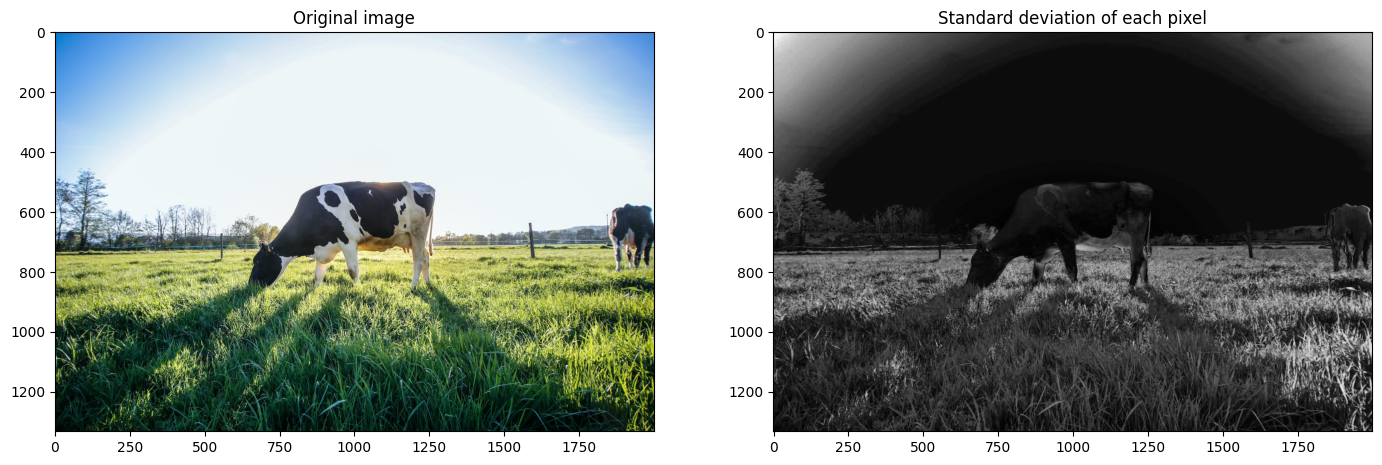

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 10))
axes[0].imshow(image)
axes[0].set_title("Original image")
# std image (the brighter the higher)
axes[1].imshow(image.std(axis=2), cmap="gray")
axes[1].set_title("Standard deviation of each pixel")

### Crop, flip, and resize

We can crop the image by slicing the array.

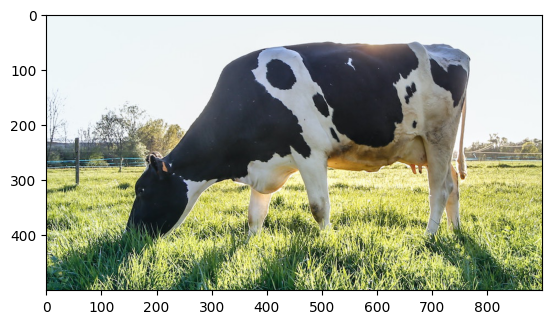

In [24]:
image_crop = image[450:950, 500:1400]
plt.imshow(image_crop)

Flipping an image can be done by reversing the order of the rows or columns in the array.

Text(0.5, 1.0, 'Flipped horizontally')

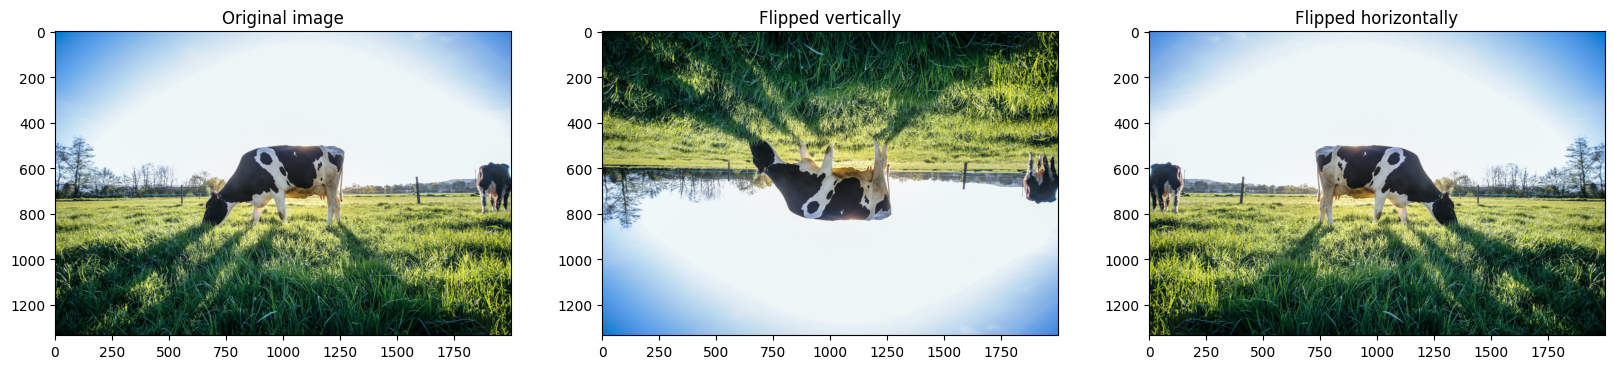

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(20, 15))
ax[0].imshow(image)
ax[0].set_title('Original image')
ax[1].imshow(image[::-1, :, :])
ax[1].set_title('Flipped vertically')
ax[2].imshow(image[:, ::-1, :])
ax[2].set_title('Flipped horizontally')

Resizing an image can be understood as mapping the original image to a new array with different size.

original image shape:  (1333, 2000, 3)
new image shape:  (2666, 4000, 3)


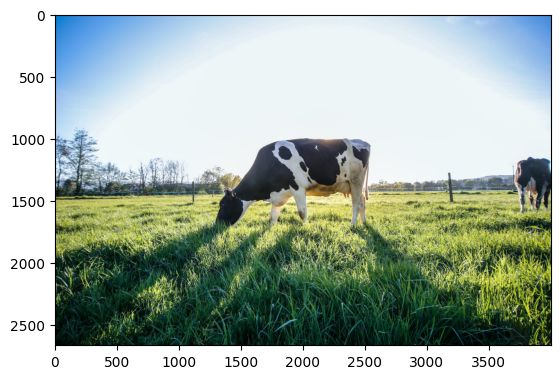

In [79]:
# resize an image in a larger canvas
H, W, C = image.shape
RESIZE_RATE = 2
nH, nW = H * RESIZE_RATE, W * RESIZE_RATE

# create a new image
img_new = np.zeros((nH, nW, C), dtype=np.uint8)
for h in range(nH):
    for w in range(nW):
        img_new[h, w, :] = image[int(h / RESIZE_RATE),
                                 int(w / RESIZE_RATE),
                                 :]

# visualization
print("original image shape: ", image.shape)
print("new image shape: ", img_new.shape)
plt.imshow(img_new)

We can wrap the above operations into a function. The function takes an image `image` and a resizing factor `resize_factor` as input, and returns a resized image. The `resize_factor` is the rate of resizing, e.g., 2 means the new image is twice as large as the original image

In [85]:
def resize_img(image, resize_rate):
    """
    """
    H, W, C = image.shape
    nH, nW = int(H * resize_rate), int(W * resize_rate)
    img_new = np.zeros((nH, nW, C), dtype=np.uint8)
    for h in range(nH):
        for w in range(nW):
            img_new[h, w, :] = image[int(h / resize_rate),
                                     int(w / resize_rate),
                                     :]
    print("original image shape: ", image.shape)
    print("new image shape: ", img_new.shape)
    return img_new

Resizing the image by enlarging it by a factor of 2 and by shrinking it by a factor of 10.

original image shape:  (1333, 2000, 3)
new image shape:  (2666, 4000, 3)
original image shape:  (1333, 2000, 3)
new image shape:  (133, 200, 3)


Text(0.5, 1.0, 'Resized image (shrinked)')

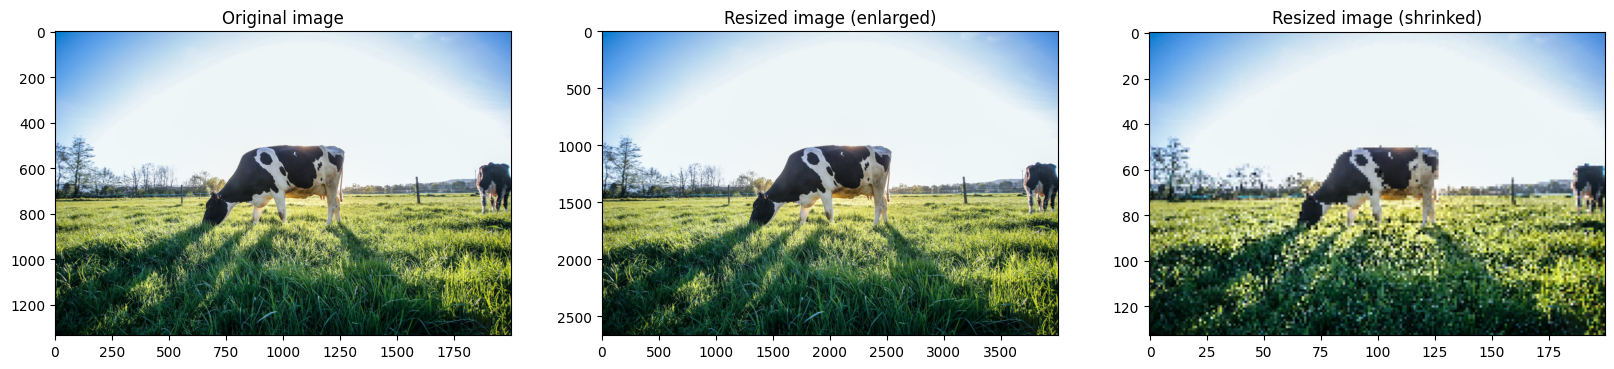

In [87]:
img_large = resize_img(image, 2)
img_small = resize_img(image, 0.1)

fig, ax = plt.subplots(1, 3, figsize=(20, 15))
ax[0].imshow(image)
ax[0].set_title('Original image')
ax[1].imshow(img_large)
ax[1].set_title('Resized image (enlarged)')
ax[2].imshow(img_small)
ax[2].set_title('Resized image (shrinked)')

### Image histogram

Image histogram is a histogram plot to visualize the distribution of pixel values in each channel. This plot allows us to visually inspect if the image is correctly exposured, or, for example, if any channel has significant higher signals than other channels.

<center><img src="figures/histogram.png?" width="800"/></center>

We can change the image dimension (i.e., reshaping) from 3D to 2D for a better representation of the pixel distribution.

<center><img src="figures/hist_trans.png" width="800"/></center>

In [89]:
print("original dimension ", image_crop.shape)

# Use "-1" to let Python figure out the remaining dimension
# (pixels, channels)
channels = image_crop.reshape((-1, 3))
print("flattened dimension", channels.shape)

# Let the channel axis become the first axis
# (channels, pixels)
channels = channels.transpose()
print("final dimension    ", channels.shape)

original dimension  (500, 900, 3)
flattened dimension (450000, 3)
final dimension     (3, 450000)


In [91]:
# since (r, g, b) are now on the first axis.
red, green, blue = channels
print("red:   ", red.shape)
print("green: ", green.shape)
print("blue:  ", blue.shape)

red:    (450000,)
green:  (450000,)
blue:   (450000,)


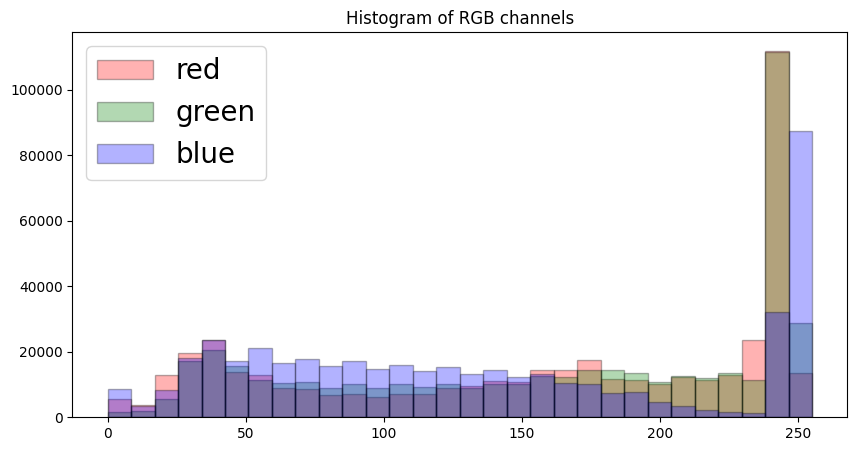

In [92]:
# define parameters
params = dict(bins=30, alpha=.3, edgecolor="black")
colors = ["red", "green", "blue"]
# plotting
plt.figure(figsize=(10, 5))
plt.title("Histogram of RGB channels")
for i, bar in enumerate([red, green, blue]):
    # i is the iteration number starting from 0 (and 1, 2,...)
    plt.hist(bar, color=colors[i], label=colors[i], **params)
plt.legend(fontsize=20)

## Image transformation

In this section, we will introduce some basic image transformation operations, including translation, rotation, and scaling. These operations can change the position, orientation, and size of any given iamge. We can define a list of 2D points, $P\in \mathbb{R}^{3\times n}$, where $n$ is the number of points, as below:

$$
P = \begin{bmatrix}
        x\\    y\\   1
    \end{bmatrix}
\tag{1}
$$

Noted that we need the third element, 1, for linear transformation. This form of vector is also known as "augmented vector".

### A four-point example

We will use a four-point example to illustrate the transformation operations. We can define the example as below:

In [93]:
# use lists to describe each vector: x, y, and intercept
x = [10, 30, 30, 10]
y = [10, 10, 20, 20]
i = [1] * 4

# put them in a numpy array
P = np.array([x,
              y,
              i])

# print
print("P \n", P)

P 
 [[10 30 30 10]
 [10 10 20 20]
 [ 1  1  1  1]]


Visualize the vector $P$ in 2D space.

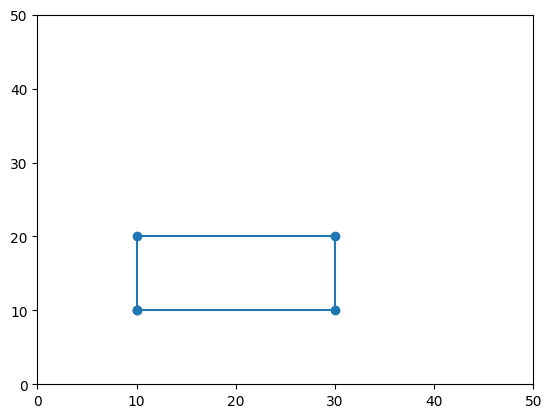

In [96]:
def plot_shape(P, label=None):
    # we don't need the intercept at this point, so we can use "_" to represent it
    x, y, _ = P
    # to complete a shape, append the array by the first element
    # e.g., from [0, 1, 2, 3] to [0, 1, 2, 3, 0]
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    # use 'o' to mark each data point
    plt.plot(x, y, marker='o', label=label)
    # set boundaries
    plt.xlim(0, 50)
    plt.ylim(0, 50)

plot_shape(P)

### Moving an image

Moving an image can be represented as linear equations:

$$

x' = x + t_x\\
y' = y + t_y\\
1 = 1

$$

where $t_x$ and $t_y$ are the translation distances in the x and y directions, respectively. And $x'$ and $y'$ are the new coordinates of the point after translation.

The transition information can be represented by a translation matrix, $T\in \mathbb{R}^{3\times 3}$:

$$

T = \begin{bmatrix}
        1 & 0 & t_x\\
        0 & 1 & t_y\\
        0 & 0 & 1
    \end{bmatrix}

$$

We can use the translation matrix to transform the four points.

$$

\hat{P} = TP

$$

is equivalent to

$$

\begin{bmatrix}
    x'\\    y'\\   1
\end{bmatrix}

= \begin{bmatrix}
        1 & 0 & t_x\\
        0 & 1 & t_y\\
        0 & 0 & 1
    \end{bmatrix}
    \begin{bmatrix}
        x\\    y\\   1
    \end{bmatrix}
$$


Here we can set $t_x = 15$ and $t_y = 20$ to move the image 15 pixels to the right and 20 pixels down. The translation matrix is:

$$

T = \begin{bmatrix}
        1 & 0 & 15\\
        0 & 1 & 20\\
        0 & 0 & 1
    \end{bmatrix}

$$

P: 
 [[10 30 30 10]
 [10 10 20 20]
 [ 1  1  1  1]]
Phat: 
 [[25 45 45 25]
 [30 30 40 40]
 [ 1  1  1  1]]


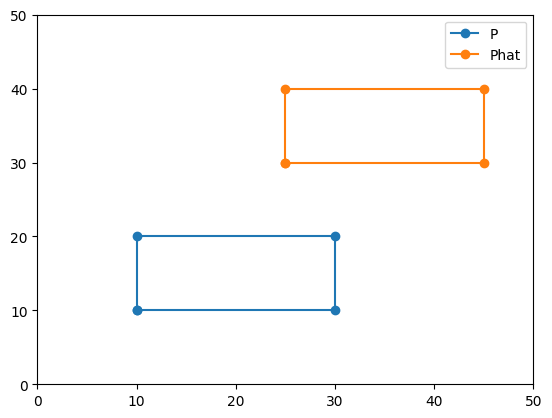

In [100]:
tx = 15
ty = 20
T = np.array([[1, 0, tx],
              [0, 1, ty],
              [0, 0, 1]])
Phat = T @ P

print("P: \n", P)
print("Phat: \n", Phat)

# plotting
plot_shape(P, "P")
plot_shape(Phat, "Phat")
plt.legend()

### Image rotation

If we futher define other elements in the transformation matrix, we are able to rotate an image by any specific angle. We can re-define the transformation as:

$$
\hat{P}
=
\begin{bmatrix}
    \cos{\theta} & -\sin{\theta}  & t_x \\
    \sin{\theta} & \cos{\theta} & t_y \\
    0 & 0 & 1

\end{bmatrix}
P

$$

where $\theta$ is the rotation angle.

We can rotate the image by 45 degrees to demonstrate the image rotation.

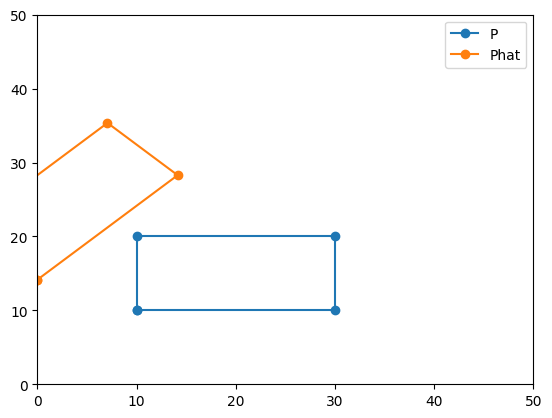

In [104]:
angle = 45
tx = 0
ty = 0
radian = angle * np.pi / 180 # 360 degrees = 2 * pi * radians
T = np.array([[np.cos(radian), -np.sin(radian), tx],
              [np.sin(radian), np.cos(radian), ty],
              [0, 0, 1]])

Phat = T @ P

# plotting
plot_shape(P, "P")
plot_shape(Phat, "Phat")
plt.legend()

## Image filtering (Convolution)

### Formulation

Image filtering is a common operation in image processing. It is used to enhance the image by removing noise, or to extract features from the image. The mathematical formulation of image filtering is called convolution. We can use the following equation to describe the convolution operation:

$$

g(x, y) = \sum_{i=-\infty}^{\infty}\sum_{j=-\infty}^{\infty}f(x+i, y+j)h(i, j)

$$


<center><img src="figures/conv.png" width="1000"/></center>


### Input matrix

Let's generate an example 2D matrix to demonstrate the convolution operation.

$$

f = \begin{bmatrix}
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
        0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0\\
        0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0\\
        0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0\\
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
        0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0
    \end{bmatrix}

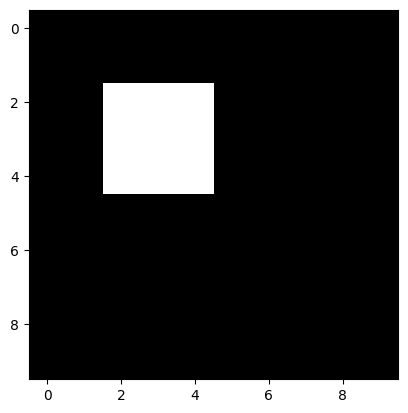

In [120]:
import numpy as np

# generate a 10x10 matrix filled with zeros
input = np.zeros((10, 10))
# set part of the matrix to 1
input[2:5, 2:5] = 1
# visualization
plt.imshow(input, cmap="gray")

### Kernel

We can define a sobel filtering kernl as below:

$$
h = \begin{bmatrix}
        -1 & 0 & 1\\
        -2 & 0 & 2\\
        -1 & 0 & 1
    \end{bmatrix}
$$

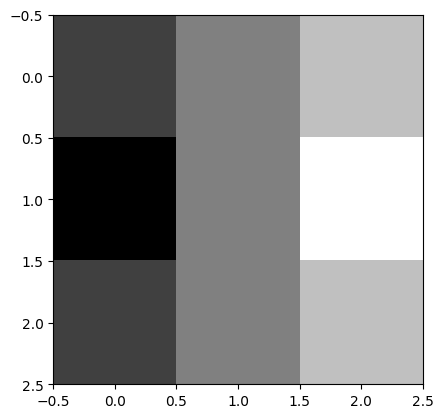

In [129]:
kernel_x = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])
plt.imshow(kernel_x, cmap="gray")

### Convolution

With the defined input matrix and the kernel, we can calculate the convolution operation  as we defined above. We can use `scipy.signal.convolve2d` to calculate the convolution operation.

The output indicate an x-direction gradient of the input matrix. We want to take the absolute value of the output to get the magnitude of the gradient.

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1., -1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.],
       [ 0., -3., -3.,  0.,  3.,  3.,  0.,  0.,  0.,  0.],
       [ 0., -4., -4.,  0.,  4.,  4.,  0.,  0.,  0.,  0.],
       [ 0., -3., -3.,  0.,  3.,  3.,  0.,  0.,  0.,  0.],
       [ 0., -1., -1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

Text(0.5, 1.0, 'Output (absolute value)')

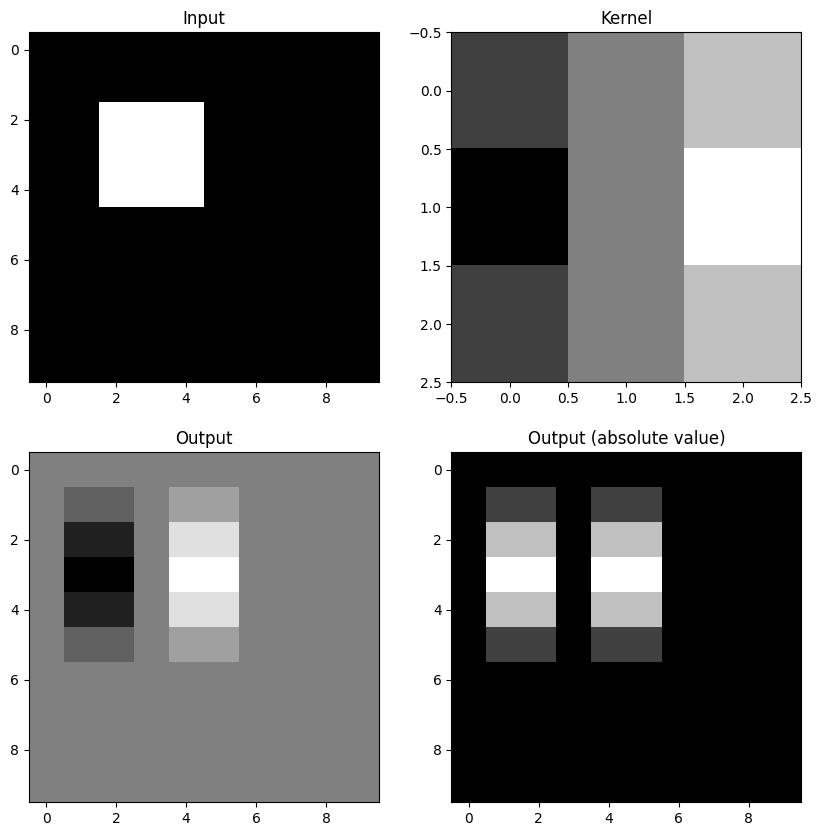

In [199]:
from scipy.signal import convolve2d

# convolution
output = convolve2d(input, kernel_x, mode="same")
display(output)

# visualization
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(input, cmap="gray")
ax[0, 0].set_title("Input")
ax[0, 1].imshow(kernel_x, cmap="gray")
ax[0, 1].set_title("Kernel")
ax[1, 0].imshow(output, cmap="gray")
ax[1, 0].set_title("Output")
ax[1, 1].imshow(abs(output), cmap="gray")
ax[1, 1].set_title("Output (absolute value)")

We can apply a similar operation to y-direction.

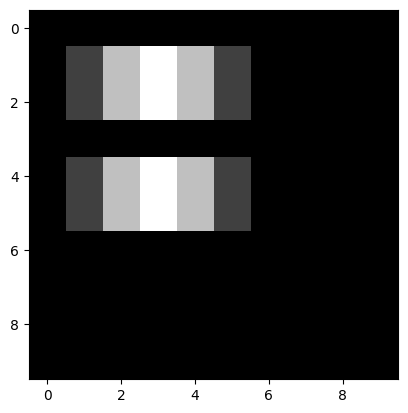

In [198]:
kernel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
# convolution
output = convolve2d(input, kernel_y, mode="same")
plt.imshow(abs(output), cmap="gray")

Or combining the two operations, we can get the sobel filtering result. We can put the second kernel on the imaginary coordinate system (noted by $j$).

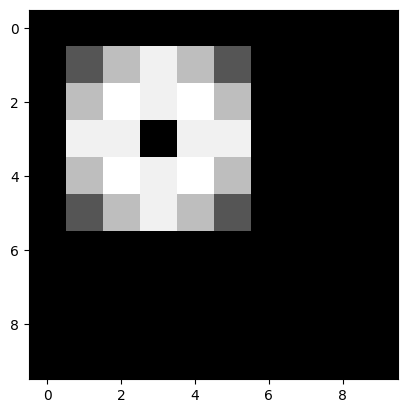

In [156]:
kernel = np.array([ [-1-1j, 0-2j, 1-1j],
                    [-2+0j, 0+0j, 2+0j],
                    [-1+1j, 0+2j, 1+1j]])
output = convolve2d(input, kernel, mode="same")
plt.imshow(abs(output), cmap="gray")

### Binarization

Once we obtain the filtered image by an convolution operation, we can set a threshold to binarize the image.

In [161]:
img_conv2d = abs(output)
print("quantile 0.5: ", np.quantile(img_conv2d[img_conv2d > 0], 0.5))
print("quantile 0.9: ", np.quantile(img_conv2d[img_conv2d > 0], 0.9))

quantile 0.5:  3.58113883008419
quantile 0.9:  4.242640687119285


We can apply these two threshold to binarize the image and compare the results.

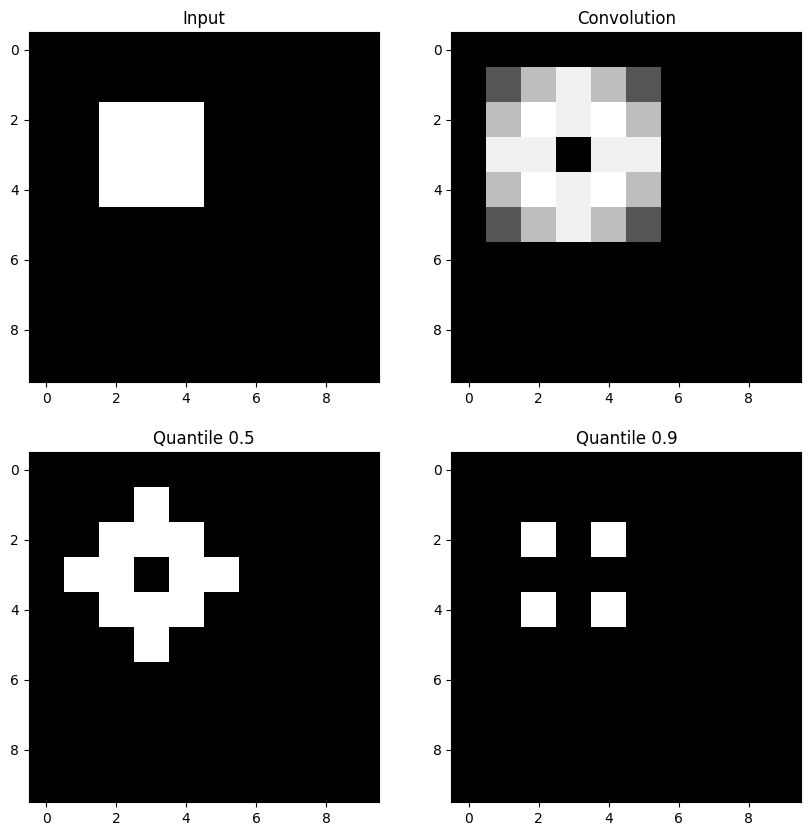

In [184]:
# binarization q0.5 and q0.9
thred_05 = np.quantile(img_conv2d[img_conv2d > 0], 0.5)
thred_09 = np.quantile(img_conv2d[img_conv2d > 0], 0.9)

# plotting
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(input, cmap="gray")
ax[0, 0].set_title("Input")
ax[0, 1].imshow(img_conv2d, cmap="gray")
ax[0, 1].set_title("Convolution")
ax[1, 0].imshow(img_conv2d >= thred_05, cmap="gray")
ax[1, 0].set_title("Quantile 0.5")
ax[1, 1].imshow(img_conv2d >= thred_09, cmap="gray")
ax[1, 1].set_title("Quantile 0.9")
plt.show()

We can see that the 0.9 quantile threshold gives a good result for corner detection.

### Real image

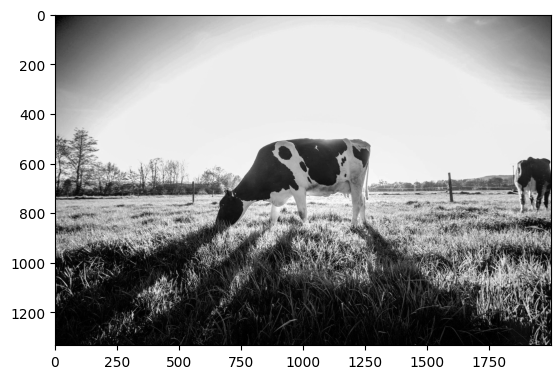

In [202]:
with PIL.Image.open("cow.jpg") as f:
    image = np.array(f)[:,:,0] # only use the first channel
plt.imshow(image, cmap="gray")

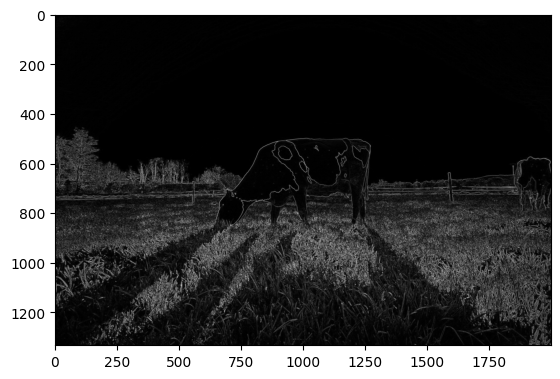

In [180]:
img_conv = convolve2d(image, kernel, mode="same")
img_conv = abs(img_conv)
plt.imshow(img_conv, cmap="gray")

Text(0.5, 1.0, 'Binarized (0.9 qunatile)')

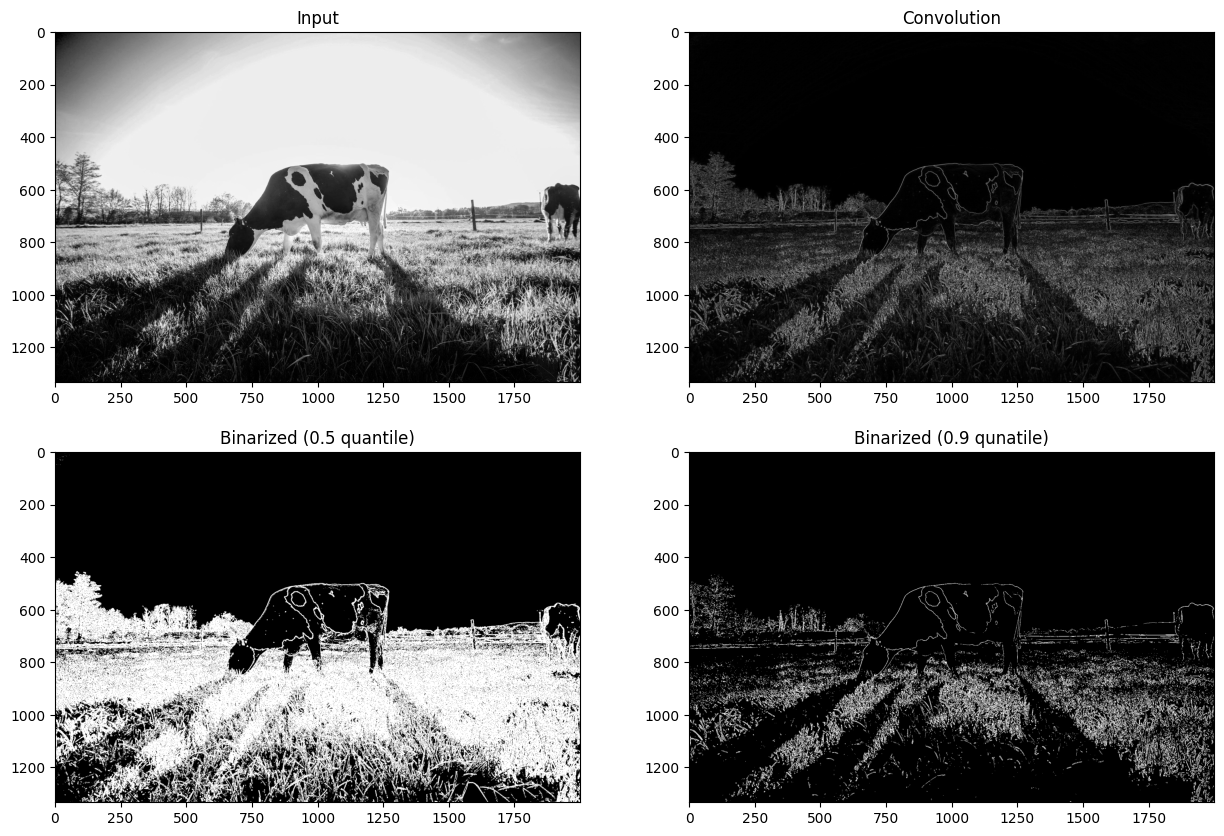

In [196]:
thred05 = np.quantile(img_conv[img_conv > 0], .5)
thred09 = np.quantile(img_conv[img_conv > 0], .9)

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0, 0].imshow(image, cmap="gray")
ax[0, 0].set_title("Input")
ax[0, 1].imshow(img_conv, cmap="gray")
ax[0, 1].set_title("Convolution")
ax[1, 0].imshow(img_conv >= thred05, cmap="gray")
ax[1, 0].set_title("Binarized (0.5 quantile)")
ax[1, 1].imshow(img_conv >= thred09, cmap="gray")
ax[1, 1].set_title("Binarized (0.9 qunatile)")


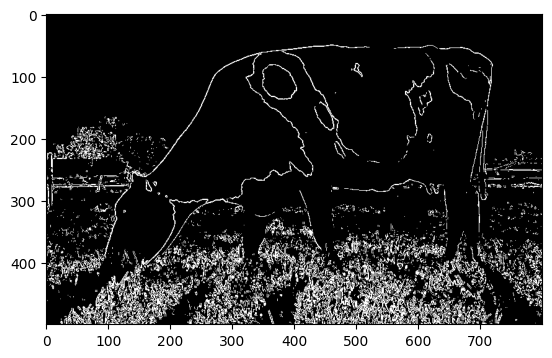

In [195]:
img_09 = img_conv >= thred09
plt.imshow(img_09[450:950, 550:1350], cmap="gray")

### Other kernels

Except for the sobel filtering kernel for edge detection, we can also use other kernels for other purposes. For example, we can use a kernel to sharpen the image.

0 800


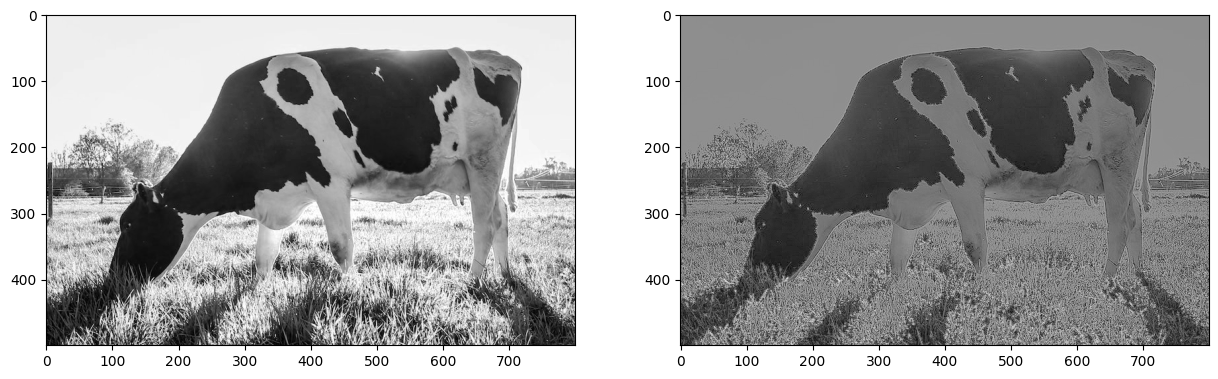

In [233]:
k_shp = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]),
    dtype='int')
imgc = convolve2d(image, k_shp, mode="same")
imgc = abs(imgc)

# visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes[0].imshow(image[450:950, 550:1350], cmap="gray")
axes[1].imshow(imgc[450:950, 550:1350]**.5, cmap="gray")

Or Gaussian blur the image.

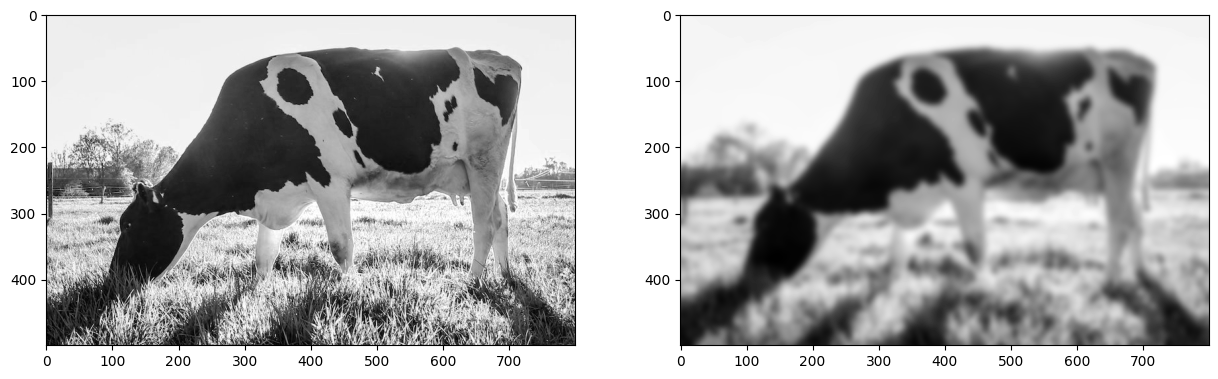

In [213]:
k_gauss = np.array((
    [1, 4, 1],
    [4, 9, 4],
    [1, 4, 1]),
    dtype='int') / 29

imgc = convolve2d(image, k_gauss, mode="same")
for _ in range(50):
    imgc = convolve2d(imgc, k_gauss, mode="same")

# visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes[0].imshow(image[450:950, 550:1350], cmap="gray")
axes[1].imshow(abs(imgc)[450:950, 550:1350], cmap="gray")